In [90]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

##reference: https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9


In [91]:
class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation='relu', learning_rate=0.1, weight_init='normal', batch_size=50, num_epochs=100):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """

        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
        
        self.layers=n_layers
        self.layer_sizes=layer_sizes
        self.act_func=activation
        self.learning_rate=learning_rate
        self.weight_init=weight_init
        self.batch_size=batch_size
        self.epochs=num_epochs
        self.weights=[[]] #layer added for weights
        self.biases=[[]]  #dummy layer for biases
        for  i in range(self.layers-1):
          if weight_init == 'zero':
            bias= self.zero_init((self.layer_sizes[i+1]))
            weight=self.zero_init((self.layer_sizes[i],self.layer_sizes[i+1]))
          elif weight_init == 'random':
            bias= self.random_init_init((self.layer_sizes[i+1]))
            weight=self.random_init((self.layer_sizes[i],self.layer_sizes[i+1]))
          else:
            bias= self.normal_init((self.layer_sizes[i+1]))
            weight=self.normal_init((self.layer_sizes[i],self.layer_sizes[i+1]))
          self.weights.append(weight)
          self.biases.append(bias)
        # Store the weights and biases at every epoch
        self.itr_weights=[]
        self.itr_biases=[]

    def relu(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        ans=np.copy(X)
        return np.maximum(ans,0)

    def relu_grad(self, X):
        """
        Calculating the gradient of ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        ans=copy.deepcopy(X)
        ans[ans>=0]=1   # if X is greater than 0, it would 1 otherwise 0
        ans[ans<0]=0
        return ans

    def sigmoid(self, X):
        """
        Calculating the Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        ans=copy.deepcopy(X)
        return 1/(1+np.exp(-ans))

    def sigmoid_grad(self, X):
        """
        Calculating the gradient of Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        ans=copy.deepcopy(X)
        sig=self.sigmoid(X)          # sigmoid_grad = sigmoid(1-sigmoid)
        return sig*(1-sig)

    def linear(self, X):
        """
        Calculating the Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        ans=copy.deepcopy(X)    #for linera return X
        return ans

    def linear_grad(self, X):
        """
        Calculating the gradient of Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.ones(X.shape)  #gardient of linar X is 1, so return the array of 1's of same shape

    def tanh(self, X):
        """
        Calculating the Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        ans=copy.deepcopy(X)
        return 2*self.sigmoid(2*ans)-1   # 2sigmoid(X) -1

    def tanh_grad(self, X):
        """
        Calculating the gradient of Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        ans=copy.deepcopy(X)
        return 1- np.power(self.tanh(ans),2)  #1-tanh(X)^^2

    def softmax(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        ans=copy.deepcopy(X)
        a=np.exp(ans)
        b=np.sum(a,axis=-1).reshape(a.shape[0],1)    
        return a/b

    def softmax_grad(self, X):
        """
        Calculating the gradient of Softmax activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        ans=copy.deepcopy(X)
        b=np.sum(np.exp(ans),axis=-1)
        b=b.reshape(b.shape[0],1)
        a=np.exp(ans)*(b-np.exp(ans))
        return a/np.power(b,2)

    def zero_init(self, shape):
        """
        Calculating the initial weights after Zero Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        return np.zeros(shape)  # no effect by multiplication by 0.01 so omitted that here

    def random_init(self, shape):
        """
        Calculating the initial weights after Random Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        np.random.seed(69)
        return 0.01*np.random.rand(shape)  #random initialisation with a scaling factor of 0.01

    def normal_init(self, shape):
        """
        Calculating the initial weights after Normal(0,1) Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        np.random.seed(69)
        return 0.01*np.random.normal(0,1,shape)  # normal initialisation with a scaling factor of 0.01

    def apply_act_func(self,X):
        #apply the corresponding activation function and return that
        X=copy.deepcopy(X)
        if(self.act_func=='relu'):
          return self.relu(X)
        elif(self.act_func=='sigmoid'):
          return self.sigmoid(X)
        elif(self.act_func=='linear'):
          return self.linear(X)
        elif(self.act_func=='tanh'):
          return self.tanh(X)
        else:
          return self.softmax(X)

    def apply_act_func_grad(self,X):
      #apply the corresponding gradient activation function
      X=copy.deepcopy(X)
      if(self.act_func=='relu'):
        return self.relu_grad(X)
      elif(self.act_func=='sigmoid'):
        return self.sigmoid_grad(X)
      elif(self.act_func=='linear'):
        return self.linear_grad(X)
      elif(self.act_func=='tanh'):
        return self.tanh_grad(X)
      else:
        return self.softmax_grad(X)

    def fit(self,X, y):
        """
        Fitting (training) the linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.
        
        Returns
        -------
        self : an instance of self
        """

        self.X_train=copy.deepcopy(X)
        self.Y_train=copy.deepcopy(y)
        #shuffle X_train and Y_train
        num_batches = int(len(X)/self.batch_size) #number of batches are computed for the given batch sizze
        for i in range(self.epochs):
          for j in range(num_batches):
            #break the data into small batches
            start=j*self.batch_size
            end=start+self.batch_size
            tmp_X=np.copy(self.X_train[start:end,:])  #take the batch of X and y
            tmp_Y=np.copy(self.Y_train[start:end])
            #forward phase
            output=self.forward(tmp_X)  # passed that to the forward function
            #backward phase
            self.backward(tmp_X,tmp_Y,output)  # padded that output to backward function
          #storing wieghts and biases for each epoch
          self.itr_weights.append(copy.deepcopy(self.weights))
          self.itr_biases.append(copy.deepcopy(self.biases))
        return self

    def forward(self,X):
      #forward propagation flow  
      input_vector=np.copy(X)
      self.y_before=[[]] # wi*xi_bi -> for each layer; output before applying activation function 
      self.y_after=[[]]## output after applying activation function on wi*xi+bi
      for i in range(1,self.layers):
        try:
          out1=np.dot(input_vector,self.weights[i])+self.biases[i]
          self.y_before.append(out1)
          if(i==self.layers-1):
            out2=self.softmax(out1)  #last layer should be the softmax layer
          else:
            out2=self.apply_act_func(out1)  #otherwise apply the normal activation function
          self.y_after.append(out2) #save the output layer
          input_vector=out2 #now change the next input layer
        except:
          print("layer=",i,"  ",self.weights[i].shape,self.biases[i].shape)
      return(input_vector)

    def backward(self, X, y, output):
      # BackPropagation of the Neural Network
      # place of the probability to calculate loss and the gradient of cross entropy
      array_ones = np.zeros_like(output)
      array_ones[np.arange(len(output)),y] = 1
      # solve (1-p) for Neural Network last layer's output
      middle = (- array_ones + output) / output.shape[0] 
      input_gradient = np.dot(middle,self.weights[self.layers-1].T)
      weight_gradient = np.dot(self.y_after[self.layers-2].T,middle)
      bias_gradient = middle.mean(axis=0)*self.y_after[self.layers-2].shape[0]
      # updating weights and bias of last layer
      self.weights[self.layers-1] -= self.learning_rate * weight_gradient
      self.biases[self.layers-1] -= self.learning_rate * bias_gradient
      
      for layer in range(self.layers-2,0,-1):
        out_grad= self.apply_act_func_grad(self.y_before[layer]) #apply the activation gradient of the function, just remember the last layer was sigmoid
        loss_by_sum = input_gradient * out_grad
        loss_by_out = np.dot(loss_by_sum,self.weights[layer].T)

        if(layer==1):#for the first hidden layer we use features give in X
          loss_by_weight = np.dot(X.T,loss_by_sum)
          loss_by_bias = loss_by_sum.mean(axis=0)*X.shape[0]
        else:
          loss_by_weight = np.dot(self.y_after[layer-1].T,loss_by_sum) 
          loss_by_bias = loss_by_sum.mean(axis=0)*self.y_after[layer-1].shape[0]
        input_gradient = loss_by_out
        #updating weights and bias of layer iterating on
        self.weights[layer] -= (self.learning_rate * loss_by_weight)
        self.biases[layer] -= (self.learning_rate * loss_by_bias)

    def indices_to_one_hot(self,data, nb_classes):  #perform the one hot encoding of the y
        """Convert an iterable of indices to one-hot encoded labels."""
        """Source: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python"""
        targets = data.astype(np.int).reshape(-1)    #.reshape(-1) is there to make sure we have the right labels format
        return np.squeeze(np.eye(nb_classes)[targets])

    def predict_proba(self, X):
        """
        Predicting probabilities using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the 
            class wise prediction probabilities.
        """

        # return the numpy array y which contains the predicted values
        out=self.forward(X)
        return out

    def predict(self, X):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """

        # return the numpy array y which contains the predicted values
        out=self.predict_proba(X)
        return np.argmax(out,axis=1)

    def score(self, X, y):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.

        Returns
        -------
        acc : float value specifying the accuracy of the model on the provided testing set
        """
        # return the numpy array y which contains the predicted values
        y_pred=self.predict(X)
        return np.sum(y_pred==y)/y.shape[0]
    
    def cross_entropy_loss(self, out, y):
        #returns the cross entropy loss
        output=[]
        for i in range(len(y)):
          output.append(out[i,y[i]])
        output=np.array(output)
        epsilon = 1e-12
        error = -(np.log(output+(epsilon)))
        # epsilon=1e-12
        # y = np.clip(y, epsilon, 1. - epsilon)
        # return ((-np.log(y))*out).sum(axis=1).mean()
        return np.mean(error)

    def plot(self,X_train,Y_train):
        #plots the training loss and testing loss corresponding to each epochs
        #computing training loss for eac epoch one by one after doing forward prop with the weights of that epoch 
        loss = []
        for i in range(self.epochs):
          input_vector=X_train
          weight=self.itr_weights[i]
          biases=self.itr_biases[i]
          for i in range(1,self.layers):
            out1=np.matmul(input_vector,weight[i])+biases[i]
            if(i==self.layers-1):
              out2=self.softmax(out1)
            else:
              out2=self.apply_act_func(out1)
            input_vector=out2
          loss_val=self.cross_entropy_loss(input_vector,Y_train)
          # print(loss_val,"train")
          loss.append(loss_val)
        return loss
        

In [92]:
import os
import numpy as np
import pickle
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
import seaborn as sns

Training
[5 0 4 ... 5 6 8]
Accuracy Relu :  0.9733


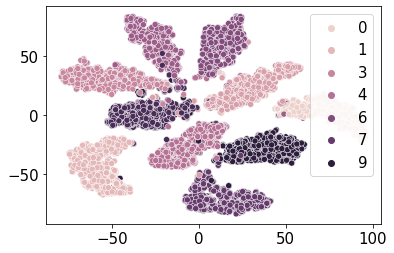

In [93]:
# train_data =pd.read_csv('/content/drive/MyDrive/Dataset/mnist_train.csv',sep=",",header=None)
# test_data = pd.read_csv('/content/drive/MyDrive/Dataset/mnist_test.csv',sep=",",header=None)
# X_train = (train_data.iloc[:,1:].values)  # to normalise #use stratified split 
# y_train = train_data.iloc[:,0].values

# X_train,ax,y_train,ay=train_test_split(X_train,y_train,test_size=0.8,stratify=y_train)

# y_test = test_data.iloc[:,0].values
# X_test = (test_data.iloc[:,1:].values)

# X_test,ax,y_test,ay=train_test_split(X_test,y_test,test_size=0.8,stratify=y_test)


X_train,Y_train=loadlocal_mnist(images_path='/content/drive/MyDrive/Dataset/train-images-idx3-ubyte/train-images.idx3-ubyte',labels_path='/content/drive/MyDrive/Dataset/train-labels-idx1-ubyte/train-labels.idx1-ubyte')

# Loading the Testing Dataset
X_test,Y_test=loadlocal_mnist(images_path='/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte',labels_path='/content/drive/MyDrive/Dataset/t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

# normalising the data
X_train, X_test = X_train/255.0, X_test/255.0

#Relu actvation function
Relu_NN=MyNeuralNetwork(5,[784,256,128,64,10],'relu', 0.1 ,'normal',200,100)
print("Training")
print(Y_train)
# Y_train = nn1.indices_to_one_hot(Y_train,10)
# print(Y_train)
Relu_NN.fit(X_train,Y_train)

# Y_test = nn1.indices_to_one_hot(Y_test,10)
print("Accuracy Relu : ", Relu_NN.score(X_test, Y_test))

x =Relu_NN.y_after[3]
y=Y_test
tsne=TSNE(n_components=2)
x1=tsne.fit_transform(x)
sns.scatterplot(x=x1[:,0],y=x1[:,1],  hue=y)
plt.show()
# colors  = {float("nan"):"purple",0:"olive",1:"blue",2:"blue",3:"green",4:"green",5:"red",6:"black",7:"yellow",8:"pink",9:"cyan",10:"grey"}
# for i in range(10):
#   d[i] = [[], []]
# for i in range(33600):
#   d[y_train[i].argmax()][0].append(x1[i, 0])
#   d[y_train[i].argmax()][1].append(x1[i, 1])
# plt.figure()
# for i in d:
#   plt.scatter(d[i][0], d[i][1], s=25, c=colours[i], marker="o", edgecolors="white", label=i)
# plt.legend()
# plt.show()



In [94]:

###uncomment for part b plot
Training_loss = []
Testing_loss = []
Training_loss= Relu_NN.plot(X_train, Y_train)
Testing_loss= Relu_NN.plot(X_test,Y_test)
print(Training_loss,Testing_loss)


[2.3012205809132236, 2.30118726035107, 2.3011516001573313, 2.301083275697169, 2.300904026144977, 2.3000368635369455, 2.193564410698154, 1.1091853831658847, 0.9662440026213319, 0.5290296665162466, 0.34940765137377905, 0.22850607915419938, 0.17804145543094552, 0.1474955135488053, 0.12581737029487938, 0.10942663961441253, 0.09610528505492084, 0.08322430223209071, 0.07399401288581851, 0.06519717589568214, 0.055761763237546544, 0.04966364702941496, 0.04312793490861037, 0.03737802581116079, 0.03285623113533797, 0.029942285352499494, 0.027818037768364483, 0.025516559320862598, 0.019651414658935235, 0.02800412553059735, 0.01460762116650713, 0.015446472596188148, 0.010900036276782998, 0.012224989238763952, 0.008010320058133527, 0.01029838776143406, 0.005891102244690713, 0.0067249022335992515, 0.004177894877054565, 0.004499422839275689, 0.003338387695131468, 0.003208075770653509, 0.002682581246627132, 0.0025787842257737905, 0.0023072791529417163, 0.0022294880838785746, 0.0019833976802127455, 0.0

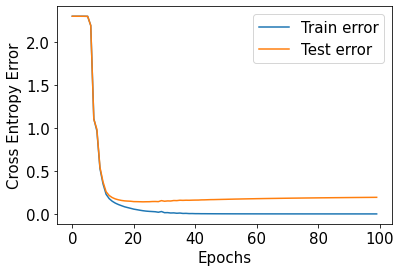

In [95]:

#plotting 
plt.plot(Training_loss,label='Train error')
plt.plot(Testing_loss,label='Test error')
plt.ylabel('Cross Entropy Error')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [96]:
#####storing model
outfile = open("/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/relu_classifiers.pkl",'wb')
pickle.dump(Relu_NN,outfile)
outfile.close()


Training
Accuracy tanh :  0.9779


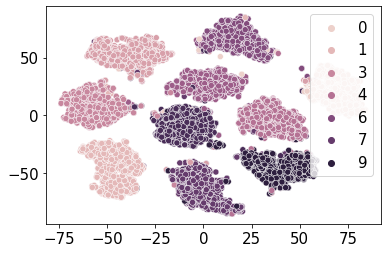

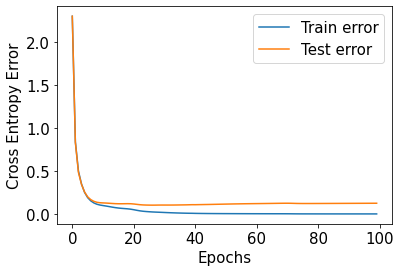

NameError: ignored

In [97]:
X_train,Y_train=loadlocal_mnist(images_path='/content/drive/MyDrive/Dataset/train-images-idx3-ubyte/train-images.idx3-ubyte',labels_path='/content/drive/MyDrive/Dataset/train-labels-idx1-ubyte/train-labels.idx1-ubyte')

# Loading the Testing Dataset
X_test,Y_test=loadlocal_mnist(images_path='/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte',labels_path='/content/drive/MyDrive/Dataset/t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

# normalising the data
X_train, X_test = X_train/255.0, X_test/255.0

#tanh actvation function
# file = open(os.path.join(os.getcwd(),("Weights/2_NN_2") ),'rb')
# nn2=pickle.load(file)
Tanh_NN=MyNeuralNetwork(5,[784,256,128,64,10],'tanh', 0.1,'normal',100,100)
print("Training")
Tanh_NN.fit(X_train,Y_train)

## part a
# y_test = nn2.indices_to_one_hot(y_test,10)
print("Accuracy tanh : ", Tanh_NN.score(X_test,Y_test))

x =Tanh_NN.y_after[3]
y=Y_test
tsne=TSNE(n_components=2)
x1=tsne.fit_transform(x)
sns.scatterplot(x=x1[:,0],y=x1[:,1],  hue=y)
plt.show()

Training_loss = []
Testing_loss = []
Training_loss= Tanh_NN.plot(X_train, Y_train)
Testing_loss= Tanh_NN.plot(X_test,Y_test)

#plotting 
plt.plot(Training_loss,label='Train error')
plt.plot(Testing_loss,label='Test error')
plt.ylabel('Cross Entropy Error')
plt.xlabel('Epochs')
plt.legend()
plt.show()

#storing the model
# outfile = open("/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/tanh_classifiers.pkl",'wb')
# pickle.dump(nn2,outfile)
# outfile.close()
#ignore the error, corrected it in the next cell

In [ ]:
#storing the model
outfile = open("/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/tanh_classifiers.pkl",'wb')
pickle.dump(Tanh_NN,outfile)
outfile.close()

Training
Accuracy sigmoid :  0.9599


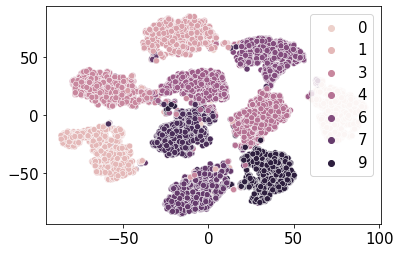

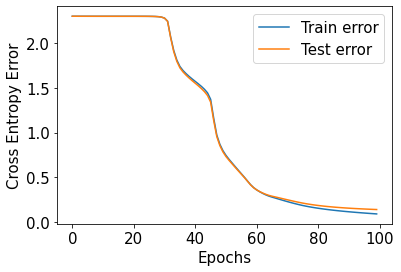

In [99]:
X_train,Y_train=loadlocal_mnist(images_path='/content/drive/MyDrive/Dataset/train-images-idx3-ubyte/train-images.idx3-ubyte',labels_path='/content/drive/MyDrive/Dataset/train-labels-idx1-ubyte/train-labels.idx1-ubyte')

# Loading the Testing Dataset
X_test,Y_test=loadlocal_mnist(images_path='/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte',labels_path='/content/drive/MyDrive/Dataset/t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

# normalising the data
X_train, X_test = X_train/255.0, X_test/255.0

from random import shuffle

#sigmoid actvation function
# file = open(os.path.join(os.getcwd(),("Weights/2_NN_3") ),'rb')
# nn3=pickle.load(file)
Sigmoid_NN=MyNeuralNetwork(5,[784,256,128,64,10],'sigmoid', 0.1,'normal',100,100)
print("Training")
Sigmoid_NN.fit(X_train,Y_train)

# y_test = nn3.indices_to_one_hot(y_test,10)
print("Accuracy sigmoid : ", Sigmoid_NN.score(X_test, Y_test))
x =Sigmoid_NN.y_after[3]
y=Y_test
tsne=TSNE(n_components=2)
x1=tsne.fit_transform(x)
sns.scatterplot(x=x1[:,0],y=x1[:,1],  hue=y)
plt.show()

Training_loss = []
Testing_loss = []
Training_loss= Sigmoid_NN.plot(X_train, Y_train)
Testing_loss= Sigmoid_NN.plot(X_test,Y_test)

#plot
plt.plot(Training_loss,label='Train error')
plt.plot(Testing_loss,label='Test error')
plt.ylabel('Cross Entropy Error')
plt.xlabel('Epochs')
plt.legend()
plt.show()

#storing model
outfile = open("/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/sigmoid_classifiers.pkl",'wb')
pickle.dump(Sigmoid_NN,outfile)
outfile.close()

Training
Accuracy linear :  0.9121


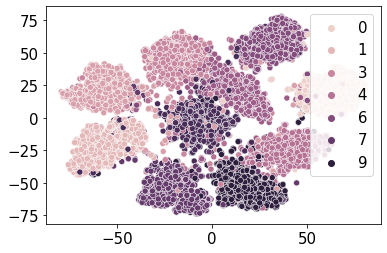

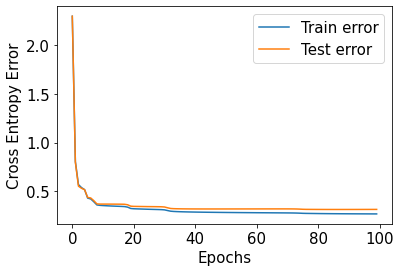

In [100]:
X_train,Y_train=loadlocal_mnist(images_path='/content/drive/MyDrive/Dataset/train-images-idx3-ubyte/train-images.idx3-ubyte',labels_path='/content/drive/MyDrive/Dataset/train-labels-idx1-ubyte/train-labels.idx1-ubyte')

# Loading the Testing Dataset
X_test,Y_test=loadlocal_mnist(images_path='/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte',labels_path='/content/drive/MyDrive/Dataset/t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

# normalising the data
X_train, X_test = X_train/255.0, X_test/255.0

linear actvation function
# file = open(os.path.join(os.getcwd(),("Weights/2_NN_4") ),'rb')
# nn4=pickle.load(file)
Linear_NN=MyNeuralNetwork(5,[784,256,128,64,10],'linear', 0.1,'normal',100,100)
print("Training")
Linear_NN.fit(X_train,Y_train)

# y_test = nn4.indices_to_one_hot(y_test,10)
print("Accuracy linear : ", Linear_NN.score(X_test, Y_test))

x =Linear_NN.y_after[3]
y=Y_test
tsne=TSNE(n_components=2)
x1=tsne.fit_transform(x)
sns.scatterplot(x=x1[:,0],y=x1[:,1],  hue=y)
plt.show()

Training_loss = []
Testing_loss = []
Training_loss= Linear_NN.plot(X_train, Y_train)
Testing_loss= Linear_NN.plot(X_test,Y_test)

#plot
plt.plot(Training_loss,label='Train error')
plt.plot(Testing_loss,label='Test error')
plt.ylabel('Cross Entropy Error')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# saving model
# outfile = open("/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/linear_classifiers.pkl",'wb')
# pickle.dump(nn4,outfile)
# outfile.close()

In [ ]:
outfile = open("/content/drive/MyDrive/Dataset/t10k-images-idx3-ubyte/linear_classifiers.pkl",'wb')
pickle.dump(nn4,outfile)
outfile.close()

In [101]:
#part 6
clf=MLPClassifier(activation='relu',random_state=69, alpha=0.1, max_iter=100)
clf.fit(X_train,Y_train)
print("Relu accuracy: ",clf.score(X_test,Y_test))

clf=MLPClassifier(activation='identity',random_state=69, alpha=0.1, max_iter=100)
clf.fit(X_train,Y_train)
print("Linear accuracy: ",clf.score(X_test,Y_test))

clf=MLPClassifier(activation='tanh',random_state=69, alpha=0.1, max_iter=100)
clf.fit(X_train,Y_train)
print("Tanh accuracy: ",clf.score(X_test,Y_test))

clf=MLPClassifier(activation='logistic',random_state=69, alpha=0.1, max_iter=100)
clf.fit(X_train,Y_train)
print("Sigmoid accuracy: ",clf.score(X_test,Y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Relu accuracy:  0.9791


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Linear accuracy:  0.9261
Tanh accuracy:  0.9787
Sigmoid accuracy:  0.9671
